In [1]:
import scipy.stats as sts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

1.	Смоделировать выборку из п независимых наблюдений над случайной величиной X, имеющей нормальный закон распределения с параметрами $$(a,sigma^2).$$

In [2]:
n = 145
q = 1.95
k = 5
a = -5
sigma = 4

In [3]:
s = np.random.normal(a, sigma, n)
a_estimate=np.mean(s)
sigma_estimate=np.std(s,ddof=1)
print(f'Оценка a: {a_estimate}, Оценка sigma: {sigma_estimate}')


Оценка a: -5.03374930139349, Оценка sigma: 3.8821768803317322


In [4]:
quants = np.quantile(s, [0.25, 0.75])
print(f'Квартиль 25%: {quants[0]}, Квартиль 75%: {quants[1]}')

Квартиль 25%: -7.324557089212452, Квартиль 75%: -2.1163580917157843


1.1.	Сгруппировать данные в интервалы и найти интервальный ряд абсолютных частот. Число интервалов группировки выбрать в соответствии с правилом, указанном в Вашем варианте. Вычислить средствами Python сумму абсолютных частот. Построить диаграмму абсолютных частот.

Абсолютные частоты: [ 1.  3.  8. 17. 27. 40. 19. 24.  6.]
Границы интервалов: [-18.12719648 -15.70771309 -13.28822969 -10.8687463   -8.4492629
  -6.0297795   -3.61029611  -1.19081271   1.22867068   3.64815408]
Сумма абсолютных частот: 145.0


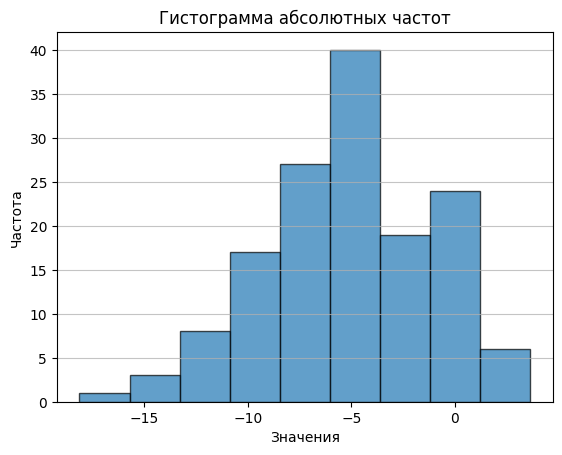

In [5]:
h=np.histogram_bin_edges(s, bins='scott')
absolute_frequencies, bin_edges, ignored = plt.hist(s, bins=h, edgecolor='black', alpha=0.7)
print(f'Абсолютные частоты: {absolute_frequencies}')
print(f'Границы интервалов: {bin_edges}')

sum_absolute_frequencies = np.sum(absolute_frequencies)
print(f'Сумма абсолютных частот: {sum_absolute_frequencies}')

plt.title(f'Гистограмма абсолютных частот')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()


1.2.	Сгруппировать данные в интервалы и найти интервальный ряд относительных частот. Вычислить средствами Python сумму относительных частот. Построить диаграмму относительных частот.

Относительные частоты по интервалам: [0.00689655 0.02068966 0.05517241 0.11724138 0.1862069  0.27586207
 0.13103448 0.16551724 0.04137931]
Сумма относительных частот: 1.0000000000000002


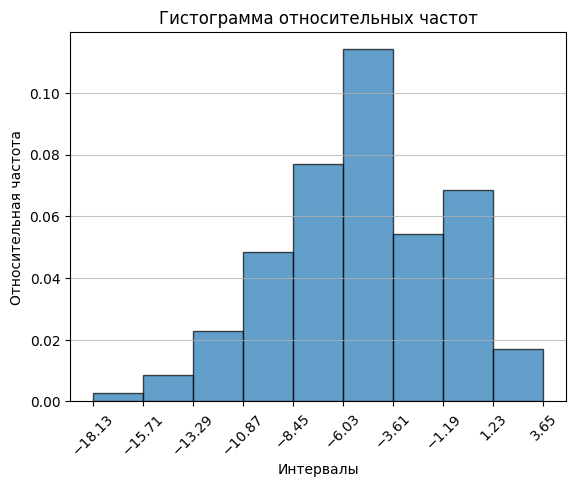

In [6]:
# Вычисление относительных частот
relative_frequencies = absolute_frequencies / len(s)
print("Относительные частоты по интервалам:", relative_frequencies)

sum_relative_frequencies = np.sum(relative_frequencies)
print(f'Сумма относительных частот: {sum_relative_frequencies}')

plt.hist(s, bins=h, density=True, edgecolor='black', alpha=0.7)
plt.title('Гистограмма относительных частот')
plt.xlabel('Интервалы')
plt.ylabel('Относительная частота')
plt.xticks(bin_edges, rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

### 2.	Для визуализации данных: #

2.1.	Построить гистограмму относительных частот и теоретическую кривую распределения случайной величины X (причем гистограмму и кривую распределения разместить на одном рисунке).

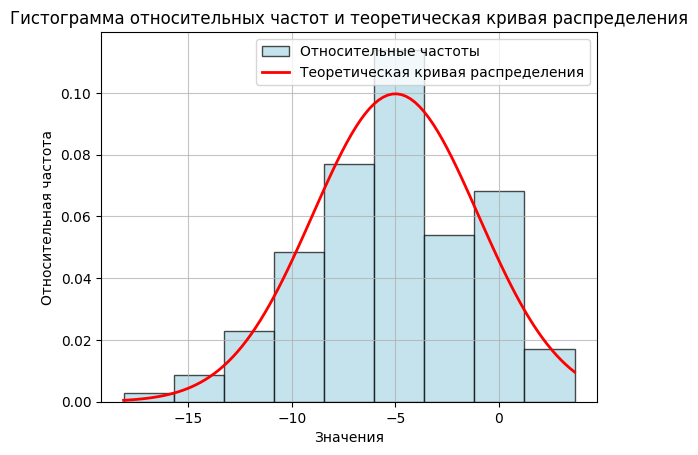

In [7]:
# Построение гистограммы относительных частот
plt.hist(s, bins=h, density=True, color="lightblue", edgecolor="black", alpha=0.7, label="Относительные частоты")

# Построение теоретической кривой распределения
x = np.linspace(min(s), max(s), 100)
y = norm.pdf(x, a, sigma)  # Теоретическая плотность вероятности
plt.plot(x, y, color='red', label='Теоретическая кривая распределения', linewidth=2)

# Настройки графика
plt.title('Гистограмма относительных частот и теоретическая кривая распределения')
plt.xlabel('Значения')
plt.ylabel('Относительная частота')
plt.legend()
plt.grid(alpha=0.75)
plt.show()

2.2. Построить гистограмму абсолютных частот и график теоретической частоты распределения случайной величины X (причем и гистограмму, и график теоретической частоты разместить на одном рисунке).

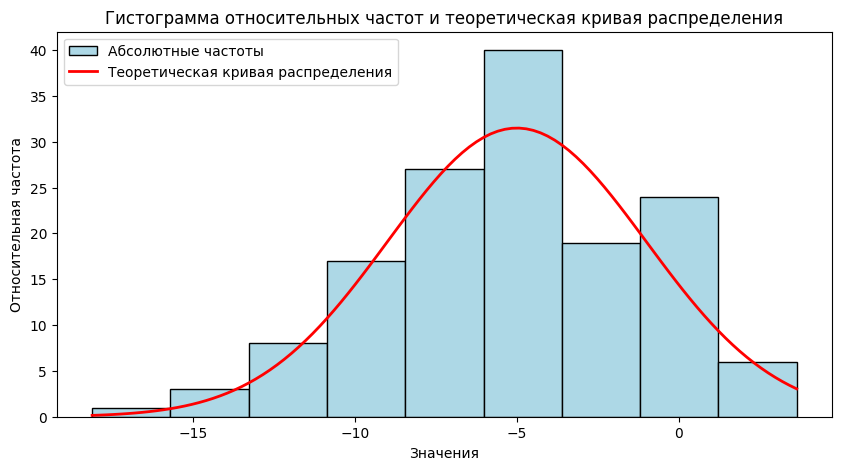

In [8]:
plt.figure(figsize=(10, 5))
# Построение гистограммы относительных частот
plt.hist(s, bins=h, color="lightblue", edgecolor="black", label="Абсолютные частоты")

# Построение теоретической кривой распределения
x = np.linspace(min(s), max(s), 100)
y = norm.pdf(x, a, sigma) * n * (h[-1] - h[0]) / len(h) # Теоретическая плотность вероятности
plt.plot(x, y, color='red', label='Теоретическая кривая распределения', linewidth=2)

# Настройки графика
plt.title('Гистограмма относительных частот и теоретическая кривая распределения')
plt.xlabel('Значения')
plt.ylabel('Относительная частота')
plt.legend()
plt.show()

2.3. Построить по выборке график эмпирической функции распределения случайной величины X (кумуляту относительных частот) и график теоретической функции распределения случайной величины X, разместив их на одном рисунке.

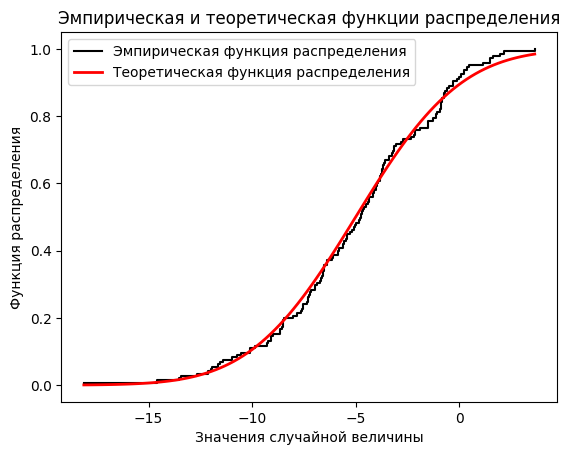

In [9]:
# Сортируем выборку для построения эмпирической функции распределения
s_sorted = np.sort(s)
# Вычисляем кумуляту относительных частот (ECDF)
empirical_cdf = np.arange(1, n + 1) / n

# Создаем значения для теоретической функции распределения (CDF)
x = np.linspace(min(s_sorted), max(s_sorted), 100)
theoretical_cdf = norm.cdf(x, a, sigma)

# Построение графика эмпирической и теоретической функции распределения
plt.step(s_sorted, empirical_cdf, where='post', label="Эмпирическая функция распределения", color="black")
plt.plot(x, theoretical_cdf, label="Теоретическая функция распределения", color="red", linewidth=2)
plt.title("Эмпирическая и теоретическая функции распределения")
plt.xlabel("Значения случайной величины")
plt.ylabel("Функция распределения")
plt.legend()
plt.show()

2.4. Построить по выборке бокс-плот распределения (“ящик с усами”) и дать ему статистическую интерпретацию. В частности, ответить на вопрос: Каково теоретически ожидаемое число выбросов для выборки данного объема?

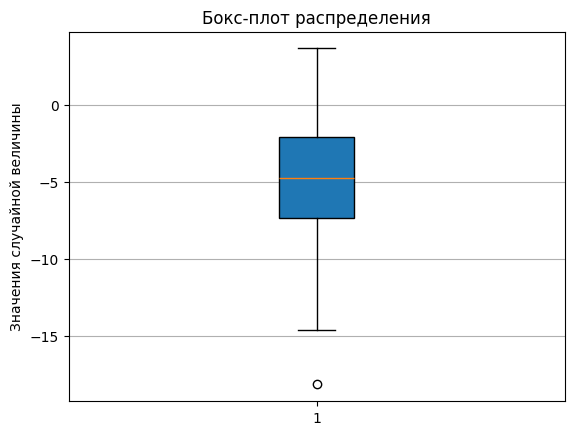

In [10]:
plt.boxplot(s, vert=True, patch_artist=True)
plt.title("Бокс-плот распределения")
plt.ylabel("Значения случайной величины")
plt.grid(axis='y')

# Отображение графика
plt.show()

A)	<strong>Какова Ваша оценка вероятности попадания значений случайной величины X в k-ый интервал полученной группировки?</strong></br>
    Ответ: (k = 5) Для оценки вероятности попадания значений в 5-й интервал, </br>
    используем относительную частоту, соответствующую этому интервалу.

B) <b> Какой из полученных в п.2 графиков содержит геометрическую интерпретацию этой оценки, покажите ее на графике?</b></br>
    Ответ: Геометрическую интерпретацию этой оценки содержит гистограмма относительных частот

C)	<b>Какой из полученных в п.2 графиков содержит геометрическую интерпретацию вероятности попадания значений</br>
    случайной величины X в k-ый интервал, покажите ее на графике.</b></br>
    Ответ: Геометрическую интерпретацию вероятности попадания значений СВ X во 2-ой интервал содержит гистограмма</br> 
    абсолютных частот и теоретическая плотность. На этом графике высота столбцов гистограммы показывает</br> 
    абсолютное количество наблюдений, попадающих в каждый интервал, что непосредственно связано с вероятностью 
    попадания значений в эти интервалы.(16 ячейка)

D)	<b>Какова Ваша оценка значения интегральной функции распределения в правой границе k-ого интервала полученной группировки?</br> 
    А чему равно точное значение интегральной функции распределения в правой границе k-ого интервала?</b></br> 
    Ответ: Значение ИФР в правой границе интервала можно оценить, используя относительные частоты значений, которые попадают</br>
    в этот интервал, и все предыдущие интервалы. Это можно сделать, суммируя относительные частоты всех интервалов до 2го включительно.</br>
    Точное значение ИФР в правой границе для нормального распределения можно вычислить с помощью функции</br>
    распределения нормального распределения

In [11]:
print(f"Оценка вероятности попадания значений в 5-й интервал: {relative_frequencies[5]}")

Оценка вероятности попадания значений в 5-й интервал: 0.27586206896551724


Относительные частоты по интервалам: [0.00689655 0.02068966 0.05517241 0.11724138 0.1862069  0.27586207
 0.13103448 0.16551724 0.04137931]
Сумма относительных частот: 1.0000000000000002


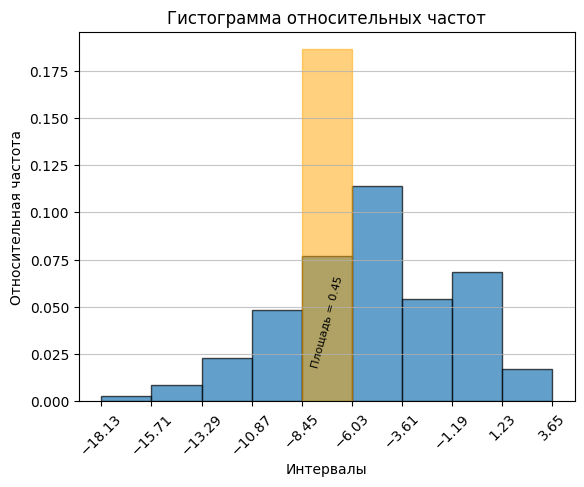

In [12]:
# Вычисление относительных частот
relative_frequencies = absolute_frequencies / len(s)
print("Относительные частоты по интервалам:", relative_frequencies)

sum_relative_frequencies = np.sum(relative_frequencies)
print(f'Сумма относительных частот: {sum_relative_frequencies}')

plt.hist(s, bins=h, density=True, edgecolor='black', alpha=0.7)
plt.title('Гистограмма относительных частот')
plt.xlabel('Интервалы')
plt.ylabel('Относительная частота')
plt.xticks(h, rotation=45)
plt.grid(axis='y', alpha=0.75)


# Обозначение пятого интервала
second_interval_start = h[4] 
second_interval_end = h[5]    

# Площадь второго интервала
area_second_interval = relative_frequencies[4] * np.diff(h)[4]

# Добавление выделения второго интервала
plt.fill_betweenx([0, relative_frequencies[4]], second_interval_start, second_interval_end, 
                  color='orange', alpha=0.5)


# Добавление текста с площадью внутри гистограммы
text_y_position = relative_frequencies[4] * 0.1  # Позиция текста внутри гистограммы
plt.text((second_interval_start + second_interval_end) / 2, text_y_position, f'Площадь = {area_second_interval:.2f}', 
         horizontalalignment='center', fontsize=8, color='black', rotation=75)
plt.show()

## 3.	Используя таблицу значений функции Лапласа, найти вероятность P(|X - M(X)| < q * σ(X))


P(|X-M(X)| < qsigma) = 2Ф(qsigma/sigma) = 2Ф(q) = 2Ф(1,95) = 0,949

3.1 Найти вероятность (*), используя встроенные функции Python.

In [13]:
probability = norm.cdf(q) - norm.cdf(-q)
print(f"Вероятность P(|X - MX| < qσ): {probability:.3f}")

Вероятность P(|X - MX| < qσ): 0.949


3.2. Найдите по выборке оценку вероятности (*)

In [14]:
def probability(s):
    mean = np.mean(s)
    sigma = np.std(s)

    lower_bound = mean - q * sigma
    upper_bound = mean + q * sigma

    probability = np.mean((s > lower_bound) & (s < upper_bound))
    return probability

print(f"Оценка вероятности P(|X - M(X)| < {q} * sigma): {probability(s):.3f}")

Оценка вероятности P(|X - M(X)| < 1.95 * sigma): 0.959


3.3. Увеличьте объем выборки п в 50 раз и повторите п. 2.2. Объясните, как увеличение объема выборки повлияло на точность  оценки вероятности (*).

In [15]:
large_sample = np.random.normal(a, sigma, 50 * n)
print(f"Оценка вероятности по увеличенной выборке: {probability(large_sample)}")

Оценка вероятности по увеличенной выборке: 0.9475862068965517


## 4.Вычислить по выборке точечные оценки параметров распределения случайной величины X: математического ожидания, медианы, дисперсии, стандартного отклонения, коэффициента ассиметрии, эксцесса двумя способами:

4.1.  первый способ –непосредственное применение формул для вычисления   точечных оценок;

In [16]:
# Математическое ожидание
mean_estimate = np.sum(s) / n

# Медиана
ranked_sample = sorted(s)
mid_index = n // 2
median_estimate = ranked_sample[mid_index]

# Дисперсия
variance_estimate = np.sum((s - mean_estimate) ** 2) / n

# Стандартное отклонение 
std_estimate = np.sqrt(variance_estimate)

# Коэффициент асимметрии 
coefficient_asymmetry_estimate = np.sum((s - mean_estimate) ** 3) / (n * std_estimate ** 3)

# Эксцесс
excess_estimate = np.sum((s - mean_estimate) ** 4) / (n * std_estimate ** 4) - 3

print(f"Математическое ожидание: {mean_estimate}")
print(f"Медиана: {median_estimate}")
print(f"Дисперсия: {variance_estimate}")
print(f"Стандартное отклонение: {std_estimate}")
print(f"Коэффициент ассиметрии: {coefficient_asymmetry_estimate}")
print(f"Эксцесс: {excess_estimate}")

Математическое ожидание: -5.03374930139349
Медиана: -4.752160554973016
Дисперсия: 14.967357348594756
Стандартное отклонение: 3.8687669028509273
Коэффициент ассиметрии: -0.39530806712898453
Эксцесс: 0.126465079853475


4.2.  второй способ – применение встроенных функций Python, например,  describe, std, mean  и т.д.

In [17]:
ds = pd.Series(s)

mean_builtin = np.mean(ds) # Математическое ожидание
median_builtin = np.median(ds) # Медиана
variance_builtin = np.var(ds) # Дисперсия
std_builtin = np.std(ds) # Стандартное отклонение 
coefficient_asymmetry_builtin = sts.skew(ds) # Коэффициент ассиметрии
excess_builtin = sts.kurtosis(ds) # Эксцесс

print(f"Математическое ожидание: {mean_builtin}")
print(f"Медиана: {median_builtin}")
print(f"Дисперсия: {variance_builtin}")
print(f"Стандартное отклонение: {std_builtin}")
print(f"Коэффициент ассиметрии: {coefficient_asymmetry_builtin}")
print(f"Эксцесс: {excess_builtin}")

Математическое ожидание: -5.03374930139349
Медиана: -4.752160554973016
Дисперсия: 14.967357348594756
Стандартное отклонение: 3.8687669028509273
Коэффициент ассиметрии: -0.39530806712898453
Эксцесс: 0.12646507985347366


4.3. Увеличьте объем выборки п в 50 раз и повторите п. 4. 2.

In [18]:
new_ds = pd.Series(large_sample)

new_mean_builtin = np.mean(new_ds) # Математическое ожидание
new_median_builtin = np.median(new_ds) # Медиана
new_variance_builtin = np.var(new_ds) # Дисперсия
new_std_builtin = np.std(new_ds) # Стандартное отклонение 
new_coefficient_asymmetry_builtin = sts.skew(new_ds) # Коэффициент ассиметрии
new_excess_builtin = sts.kurtosis(new_ds) # Эксцесс

print(f"Математическое ожидание: {new_mean_builtin}")
print(f"Медиана: {new_median_builtin}")
print(f"Дисперсия: {new_variance_builtin}")
print(f"Стандартное отклонение: {new_std_builtin}")
print(f"Коэффициент ассиметрии: {new_coefficient_asymmetry_builtin}")
print(f"Эксцесс: {new_excess_builtin}")

Математическое ожидание: -4.992220383239351
Медиана: -5.014229036514826
Дисперсия: 15.948884437126713
Стандартное отклонение: 3.99360544334649
Коэффициент ассиметрии: 0.010044787324339693
Эксцесс: -0.022446315343113366


<b>A) Чему равны коэффициенты асимметрии и эксцесса распределения случайной величины X? </b></br>
Коэффициент ассиметрии: 0.066667</br>
Эксцесс: -0.078266</br>
<b>B) Объясните, как увеличение объема выборки повлияло на точность  оценок параметров распределения. </b></br>
Ответ: При увеличении объёма выборки оценки параметров распределения становятся точнее, так как чем </br>
больше объём выборки, тем точнее она характеризует генеральную совокупность (при прочих равных условиях).</br>
<b>C) Какое свойство точечных оценок параметров распределения случайной величины X объясняет такое поведение оценок параметров распределения в ответ на рост объема выборки?</b></br>
Ответ: Это свойство - состоятельность точечной оценки

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import expon

### 1.Смоделировать выборку из п независимых наблюдений над случайной величиной Y,
### имеющей закон распределения, указанный в Вашем варианте.

In [20]:
data = np.random.exponential(scale=5, size=145)
print(data)

[3.13767976e-01 1.42280868e+00 9.35223973e-01 5.20935089e+00
 8.08019423e+00 5.97566621e+00 8.12448836e+00 5.29802694e+00
 1.05118067e+00 1.04783402e+01 8.88675762e+00 5.02952008e+00
 4.13290824e+00 2.62369211e+00 8.77992788e-01 1.05715280e+01
 2.81029587e+00 3.78728789e+00 1.79173416e+00 8.86717460e+00
 3.49725282e+00 1.03333556e+01 6.84096299e+00 8.58408117e-01
 1.53480576e+01 4.32581314e-01 2.25130170e+01 2.78402073e+00
 1.15442801e+01 7.01814485e-01 1.13912518e+01 2.80702705e+00
 4.28340533e+00 6.48083300e-01 5.18136724e+00 8.12776278e-01
 3.99022035e+00 4.39106397e-01 1.39469065e+00 2.32803778e+01
 5.50071804e+00 2.45473999e+00 1.32423114e+00 7.83828948e-01
 4.99329824e+00 3.69144201e+00 2.96724356e-01 6.38574869e+00
 3.90951164e+00 8.70950797e-01 1.18882508e+00 3.22112553e-01
 1.56424317e-02 4.73040713e+00 9.31953546e+00 1.00471058e+00
 2.26161077e+00 1.06043207e+01 8.92978050e+00 4.28408242e+00
 3.04712720e+00 1.73598680e+00 7.95928271e+00 9.44604557e+00
 1.21907081e+01 4.710398

### 2. Для визуализации данных построить гистограмму относительных частот и
### теоретическую кривую распределения случайной величины Y (причем гистограмму и
### кривую распределения разместить на одном рисунке).


In [21]:
std_e = np.std(data)
h=np.histogram_bin_edges(data, bins='scott')
print(h)

[1.56424317e-02 3.01342555e+00 6.01120867e+00 9.00899180e+00
 1.20067749e+01 1.50045580e+01 1.80023412e+01 2.10001243e+01
 2.39979074e+01]


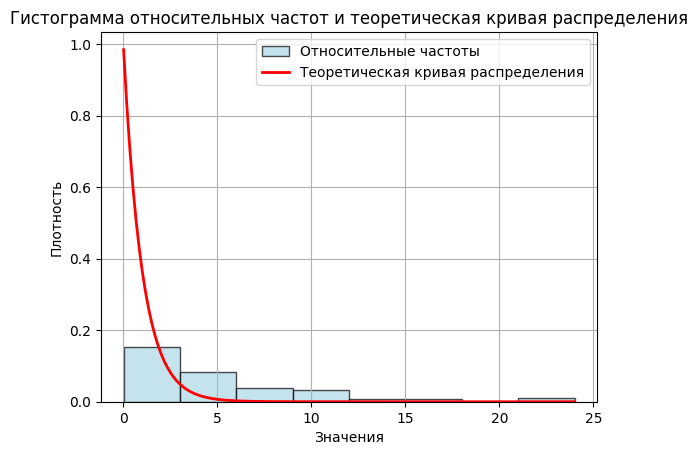

In [22]:
# Построение гистограммы относительных частот
plt.hist(data, bins=h, density=True, color="lightblue", edgecolor="black", alpha=0.7, label="Относительные частоты")

# Построение теоретической кривой распределения
x = np.linspace(min(data), max(data), 145)
y = expon.pdf(x)
plt.plot(x, y, color='red', label='Теоретическая кривая распределения', linewidth=2)

# Настройки графика
plt.title('Гистограмма относительных частот и теоретическая кривая распределения')
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.legend()
plt.grid()
plt.show()

### 3.Построить по выборке бокс-плот распределения (“ящик с усами”) случайной величины Y
### и дать ему статистическую интерпретацию. В частности, ответить на вопрос:
### Каково теоретически ожидаемое число выбросов для выборки данного объема?

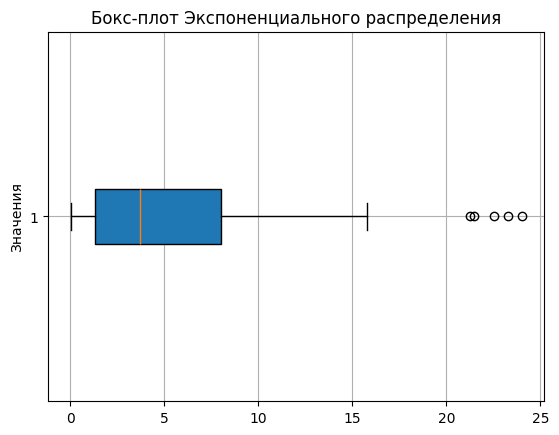

Фактическое количество выбросов: 5
Теоретическое ожидаемое количество выбросов: 0


In [23]:
plt.boxplot(data, vert=False, patch_artist=True)
plt.title("Бокс-плот Экспоненциального распределения")
plt.ylabel("Значения")
plt.grid(True)
plt.show()

# Рассчитываем основные статистики для экспоненциального распределения
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1

# Вычисляем границы для усов
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Находим выбросы для выборки экспоненциального распределения
outliers = [i for i in data if i < lower_bound or i > upper_bound]
num_outliers = len(outliers)

# Вычисляем теоретическое количество выбросов для экспоненциального распределения
# Определяем вероятность того, что значение окажется за пределами границ
p_lower = expon.cdf(lower_bound, scale=1)
p_upper = 1 - expon.cdf(upper_bound, scale=1)

# Общая теоретическая вероятность выбросов
p_outliers = p_lower + p_upper

# Теоретическое количество выбросов
theoretical_outliers = p_outliers * 145

print(f"Фактическое количество выбросов: {num_outliers}")
print(f"Теоретическое ожидаемое количество выбросов: {theoretical_outliers:.0f}")

### 4. Используя теоретические знания о функции распределения случайной величины, найти вероятность (вычисления вероятности сделать “вручную” ) P(|Y -M Y | < qσ(Y))

P(|Y - MY| < qσ(Y)) = P(-qσ(Y)+ MY < Y < qσ(Y)+ MY) = 1 - 2*Ф(1/25 * 1.95) = 1 -2Ф(0.078)= 1 -2 * 0.0279 
= 0.952

In [24]:
cdf_values_scipy = expon.cdf(data.max(),scale=5) - expon.cdf(data.min(),scale=5)

print(f"Вероятность P(|Y - MY| < qσ(Y)): {cdf_values_scipy:.3f}")

Вероятность P(|Y - MY| < qσ(Y)): 0.989


Увеличьте объем выборки п в 50 раз и повторите п. 2.2. Объясните, как увеличение
объема выборки повлияло на точность оценки вероятности (*).

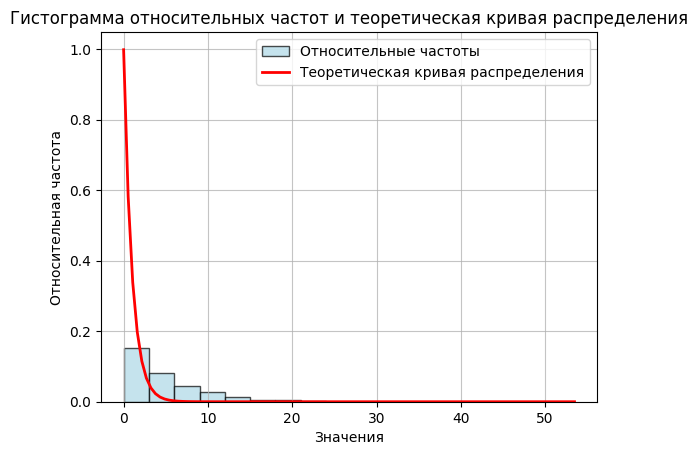

In [25]:
data_ = np.random.exponential(scale=5, size=50*145)
# Построение гистограммы относительных частот
plt.hist(data_, bins=h, density=True, color="lightblue", edgecolor="black", alpha=0.7, label="Относительные частоты")

# Построение теоретической кривой распределения
x = np.linspace(min(data_), max(data_), 100)
y = expon.pdf(x)
plt.plot(x, y, color='red', label='Теоретическая кривая распределения', linewidth=2)

# Настройки графика
plt.title('Гистограмма относительных частот и теоретическая кривая распределения')
plt.xlabel('Значения')
plt.ylabel('Относительная частота')
plt.legend()
plt.grid(alpha=0.75)
plt.show()

Вычислить по выборке точечные оценки параметров распределения случайной величины
X: математического ожидания, медианы, дисперсии, стандартного отклонения,
коэффициента ассиметрии, эксцесса, применяя встроенных функций Python, например,
describe, std, mean и т.д.
Чему равны коэффициенты ассиметрии и эксцесса распределения случайной величины Y?

In [26]:
#Вычисление точечных оценок

mean_value = np.mean(data_)  # Математическое ожидание
median_value = np.median(data_)  # Медиана
variance_value = np.var(data_)  # Дисперсия 
std_dev_value = np.std(data_)  # СКО

# Коэффициенты асимметрии и эксцесса
skewness = sts.skew(data_)  # Коэффициент асимметрии
kurtosis = sts.kurtosis(data_)  # Эксцесс 

# 3. Вывод результатов
print(f"Математическое ожидание: {mean_value:.4f}")
print(f"Медиана: {median_value:.4f}")
print(f"Дисперсия: {variance_value:.4f}")
print(f"Стандартное отклонение: {std_dev_value:.4f}")
print(f"Коэффициент асимметрии: {skewness:.4f}")
print(f"Эксцесс: {kurtosis:.4f}")

Математическое ожидание: 5.0059
Медиана: 3.4573
Дисперсия: 24.2506
Стандартное отклонение: 4.9245
Коэффициент асимметрии: 1.8883
Эксцесс: 5.4101
